# Inspecting the Workshop Data 
Before starting right away with the analysis, we need to load the data set on which we want to test different machine learning algorithms. The data is stored at FSU and is a simple .csv-file. The following lines show how to load the data. Please feel free to browse the directory and load the other (imbalanced) data sets.

In [1]:
import pandas as pd

data_directory = 'http://hadron.physics.fsu.edu/~dlersch/GlueX_PANDA_EIC_ML_Workshop'
data_name = 'hands_on_data_033_033_033.csv'
dataFrame = pd.read_csv(data_directory + '/' + data_name)

Now we want to take a quick look at the dataframe (always recommended). We do not need to check the full dataframe. The first few rows should be enough.

In [2]:
print(dataFrame.head(10))

var1      var2      var3      var4      var5      var6  label
0  1.058485  0.966484  0.018853  0.004739  0.947370  0.718451    2.0
1  4.592704  3.808958  0.021037  0.005426  3.360293  0.481386    2.0
2  1.361142  0.213187  0.003005  0.003969  0.243650  0.325567    0.0
3  2.204165  0.969037  0.007780  0.016829  0.719581  0.734593    1.0
4  0.629281  0.618626  0.024197  0.006617  0.637974  0.576872    2.0
5  1.048963  0.279840  0.002310  0.003568  0.191373  0.665752    0.0
6  0.896067  0.329471  0.005907  0.005206  0.325601  0.705401    0.0
7  0.873841  0.489065  0.018118  0.013656  0.364731  0.681083    1.0
8  0.330018  0.372559  0.020232  0.022098  0.312272  0.210790    1.0
9  1.014085  0.706302  0.014414  0.005087  0.791526  0.434839    2.0


In [ ]:
# About the Data Set
The data set consists of 500,000 labeled events with three species. Each species is characterized by six vairables which can be thought of energy deposits,  momenta, etc.

## Inspecting the dataframe
In order to get a feeling for the data, let us inspect the dataframe a bit. Since the data is labeled, we can check the abundance of each individual species

In [5]:
print("Number of events with species 1:")
n_species1 = dataFrame[dataFrame['label'] == 0.0]['label'].count()
print(n_species1)

print(" ")
print("Number of events with species 2:")
n_species2 = dataFrame[dataFrame['label'] == 1.0]['label'].count()
print(n_species2)

print(" ")
print("Number of events with species 3:")
n_species3 = dataFrame[dataFrame['label'] == 2.0]['label'].count()
print(n_species3)

Number of events with species 1:
171495
 
Number of events with species 2:
171495
 
Number of events with species 3:
171495


This allows us to calculate the relative abundances:

In [6]:
n_all_events = n_species1 + n_species2 + n_species3
r_1 = n_species1 / float(n_all_events)
r_2 = n_species2 / float(n_all_events)
r_3 = n_species3 / float(n_all_events)

print(" ")
print("Relative abundances:")
print("Species1: " + str(r_1))
print("Species2: " + str(r_2))
print("Species3: " + str(r_3))


Relative abundances:
Species1: 0.3333333333333333
Species2: 0.3333333333333333
Species3: 0.3333333333333333


Species1 is the dominating species, whereas species2 is a minority.

## Plotting the Features
Now want to look at the and check the correlations between the different variables. Here, we check the variables for species1 only. Please feel free to look at the variables for species 2 and 3 as well.


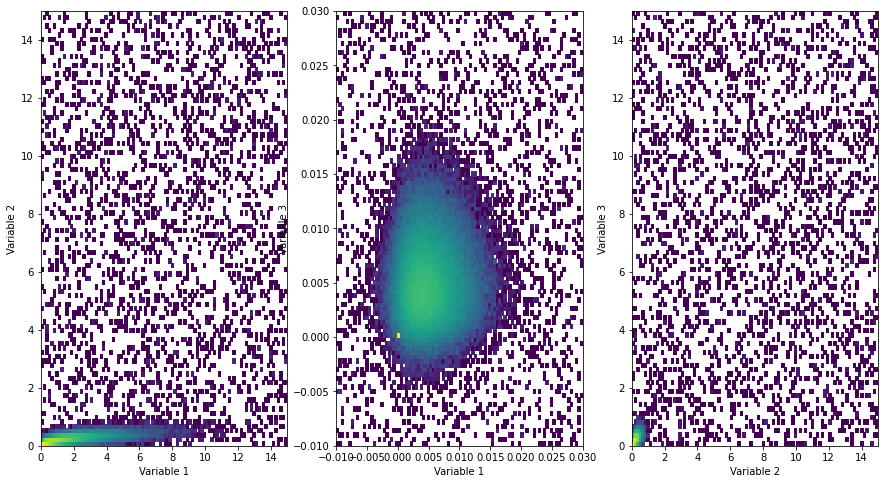

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

fig_data,ax_data = plt.subplots(1,3)
fig_data.set_size_inches(15, 8)

ax_data[0].hist2d(dataFrame[dataFrame['label']==0.0]['var1'],dataFrame[dataFrame['label']==0.0]['var2'],bins=100,norm=LogNorm(),range=[[0,15],[0,15]])
ax_data[1].hist2d(dataFrame[dataFrame['label']==0.0]['var3'],dataFrame[dataFrame['label']==0.0]['var4'],bins=100,norm=LogNorm(),range=[[-0.01,0.03],[-0.01,0.03]])
ax_data[2].hist2d(dataFrame[dataFrame['label']==0.0]['var2'],dataFrame[dataFrame['label']==0.0]['var5'],bins=100,norm=LogNorm(),range=[[0,15],[0,15]])

ax_data[0].set_xlabel('Variable 1')
ax_data[0].set_ylabel('Variable 2')

ax_data[1].set_xlabel('Variable 1')
ax_data[1].set_ylabel('Variable 3')

ax_data[2].set_xlabel('Variable 2')
ax_data[2].set_ylabel('Variable 3')

plt.show()


## Extract Feature Correlations
Getting the feature correlations from a dataframe is quite easy, by simply using the .corr() method. The following lines show how to get the correlations from the variables shown above

<Figure size 432x288 with 0 Axes>

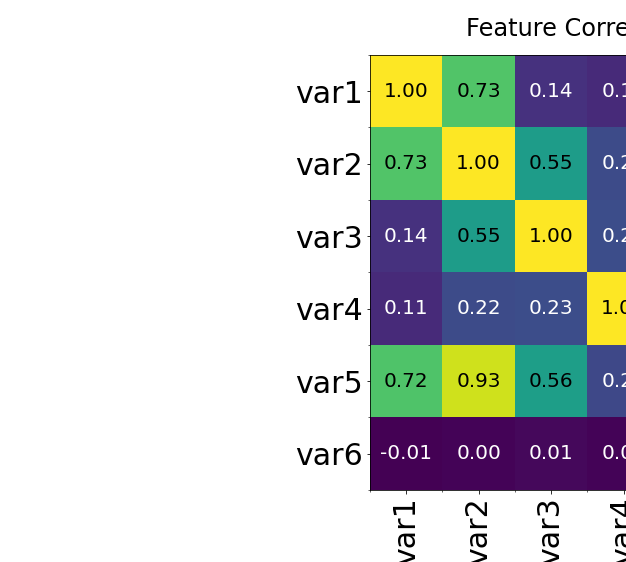

In [8]:
import numpy as np

feature_names = ['var1','var2','var3','var4','var5','var6']
feature_correlations = dataFrame[feature_names].corr('spearman').values #--> There are different options on how to calculate the feature correlations

textFormat = '.2f'
matrixTitle = 'Feature Correlations'
        
plt.rcParams['font.size'] = 20
plt.subplots_adjust(bottom=0.25,top=0.9)
        
fig,ax = plt.subplots()
fig.set_size_inches(15.0,8.0)
im = ax.imshow(feature_correlations,interpolation='nearest')

ax.set_xticks(np.arange(feature_correlations.shape[1]))
ax.set_yticks(np.arange(feature_correlations.shape[0]))
ax.set_xticklabels(feature_names,rotation='vertical',fontweight='normal')
ax.set_yticklabels(feature_names,rotation='horizontal',fontweight='normal')
ax.set_xticks(np.arange(feature_correlations.shape[1]+1)-.5,minor=True)
ax.set_yticks(np.arange(feature_correlations.shape[0]+1)-.5,minor=True)

ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_title(matrixTitle,y = 1.03,fontweight='normal')
ax.figure.colorbar(im,ax=ax)

colorThresh = feature_correlations.max()  / 2.
nDim = len(feature_names)
#++++++++++++++++++++++++++++++++
for i in range(0,nDim):
    #++++++++++++++++++++++++++++++++
    for j in range(0,nDim):
                  ax.text(j,i, format(feature_correlations[i][j],textFormat),
                  fontweight = 'normal',
                  ha = 'center',
                  va = 'center', 
                  color = "black" if feature_correlations[i,j] > colorThresh else "white")
    #++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++

plt.show()